In [2]:
import pandas as pd
import numpy as np
import requests

In [7]:
response= requests.get('http://api.openweathermap.org/data/2.5/air_pollution/history?lat=19.075983&lon=72.877655&start=1672511400&end=1693506600&appid=ca5311d76bd79399ef063aee16919b83')


In [9]:
df = pd.DataFrame(response.json()['list'])

In [11]:
dataAQI =  pd.DataFrame.from_records(df['main'])

In [13]:
data = pd.DataFrame.from_records(df['components'])

In [14]:
data['date'] = df.loc[:,'dt']
data['AQI'] = dataAQI.loc[:,'aqi']

In [15]:
data

,co,no,no2,o3,so2,pm2_5,pm10,nh3,date,AQI
0,1401.90,0.00,44.55,67.23,41.48,135.13,175.59,16.47,1672513200,5
1,1174.93,0.00,38.04,61.51,40.05,128.98,162.93,11.40,1672516800,5
2,1054.76,0.00,33.59,55.79,50.07,142.35,171.39,7.47,1672520400,5
3,1001.36,0.00,31.53,54.36,62.94,161.67,187.33,4.75,1672524000,5
4,1054.76,0.00,32.22,50.78,55.31,163.79,188.75,6.40,1672527600,5
...,...,...,...,...,...,...,...,...,...,...
5731,1108.17,21.46,26.73,0.11,32.42,46.35,81.12,15.83,1693490400,3
5732,1588.82,32.19,23.99,0.00,42.44,72.56,119.38,24.07,1693494000,4
5733,2323.15,47.39,24.68,0.00,61.04,115.56,177.60,36.98,1693497600,5
5734,2937.32,59.90,25.02,0.00,78.20,157.83,235.11,49.65,1693501200,5


In [16]:
data['date'] = pd.to_datetime(data['date'],unit='s')
grouped = data.groupby(pd.Grouper(key='date', freq='D'))
daily_data = grouped.mean()

In [17]:
daily_data

,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI
date,,,,,,,,,
2022-12-31,1137.542000,0.000000,35.986000,57.934000,49.970000,146.384000,177.198000,9.298000,5.000000
2023-01-01,1479.785000,2.412500,46.117917,88.554167,54.469167,177.681667,211.292083,14.394583,5.000000
2023-01-02,2362.648333,10.372917,74.929583,62.845833,72.906667,250.995000,302.828750,24.751250,5.000000
2023-01-03,2314.527917,12.046250,69.002083,65.507500,72.647500,243.778750,293.117917,23.635833,5.000000
2023-01-04,3276.110833,21.467917,92.879167,59.503333,88.412917,319.108333,380.348333,31.723333,5.000000
...,...,...,...,...,...,...,...,...,...
2023-08-27,295.122500,0.970417,9.360000,20.395417,10.860417,12.866250,18.107083,2.879167,1.666667
2023-08-28,287.681250,1.607083,9.760417,20.261667,14.046667,11.516667,16.053750,2.701250,1.916667
2023-08-29,746.011250,6.746250,23.751250,23.777083,30.343750,40.992917,56.897917,12.244167,3.041667


In [18]:
daily_data = daily_data.reset_index()

In [38]:
daily_data=daily_data.dropna()

In [20]:
## now we will run linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split

In [39]:
X = daily_data[['co','no','no2','o3','so2','pm2_5','pm10','nh3']]
y = daily_data['AQI']

In [40]:
X_train , X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(X_train,y_train)

LinearRegression()

In [43]:
reg.score(X_test,y_test)

0.911947988101858

In [44]:
import seaborn as sns


<AxesSubplot:ylabel='AQI'>

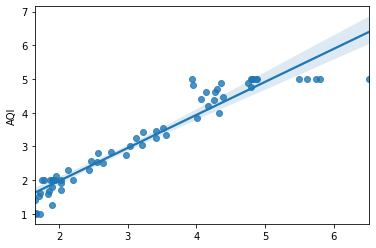

In [45]:
sns.regplot(data=daily_data,x=reg.predict(X_test),y=y_test)